In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [2]:
from tabulate import tabulate

# Pretty print pandas DataFrame
def pprint(df):
    # print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=True))
    display(df)

# Load Data

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/NLP Project Team 4/P2/restaurant_reviews-v2-1.xlsx')

pprint(df.head())

,Restaurant,Review,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,Tikka Shack,Great food and great atmosphere! The chicken t...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tikka Shack,I had heard good things about Tikka Shak so I ...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tikka Shack,I was driving by tikka shack one day and decid...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tikka Shack,Tikka Shack had the most modern and up-to-date...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India Palace\nIndian\nRestaurant,Today is the third time I've come to India Pal...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def get_df_info(df):

    print("Dataframe Shape:")
    print(df.shape)

    print("\n" + "#" * 50 + "\n")

    print("Dataframe Overview:")
    print(df.info())

    print("\n" + "#" * 50 + "\n")

    print("Dataframe Description")
    pprint(df.describe())


get_df_info(df)

Dataframe Shape:
(260, 14)

##################################################

Dataframe Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             260 non-null    object 
 1   Review                 260 non-null    object 
 2   Real=1/Fake=0          260 non-null    int64  
 3   positive=1/negative=0  260 non-null    int64  
 4   AWL                    0 non-null      float64
 5   ASL                    0 non-null      float64
 6   NOW                    0 non-null      float64
 7   NVB                    0 non-null      float64
 8   NAJ                    0 non-null      float64
 9   NPV                    0 non-null      float64
 10  NST                    0 non-null      float64
 11  CDV                    0 non-null      float64
 12  NTP                    0 non-null      float64
 13  TPR       

,Real=1/Fake=0,positive=1/negative=0,AWL,ASL,NOW,NVB,NAJ,NPV,NST,CDV,NTP,TPR
count,260.000000,260.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.500000,0.519231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.500964,0.500594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [6]:
def drop_columns(df, columns_to_drop):
    df = df.copy()
    print("Original DataFrame:")
    print(df.shape)
    df = df.drop(columns=columns_to_drop)
    print("Updated DataFrame after dropping specified columns:")
    print(df.shape)
    return df

In [7]:
columns_to_drop = ['Restaurant', 'positive=1/negative=0', 'AWL', 'ASL', 'NOW', 'NVB',
                   'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR']

df_dropped = drop_columns(df, columns_to_drop)

Original DataFrame:
(260, 14)
Updated DataFrame after dropping specified columns:
(260, 2)


In [8]:
df = df_dropped.copy()

In [9]:
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
stop_words = set(stopwords.words('english'))
!pip install textblob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Feature Engineering

In [10]:
def preprocess(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

def extract_features(review):
    # Preprocess the review
    cleaned_review = preprocess(review)

    # Tokenize words and sentences
    words = word_tokenize(cleaned_review)
    sentences = sent_tokenize(review)

    # Calculate AWL
    awl = sum(len(word) for word in words) / len(words)

    # Calculate ASL
    asl = len(words) / len(sentences)

    # Calculate NWO
    nwo = len(words)

    # Calculate NVB and NAJ
    pos_tags = nltk.pos_tag(words)
    nvb = len([word for word, pos in pos_tags if pos.startswith('VB')])
    naj = len([word for word, pos in pos_tags if pos.startswith('JJ')])

    # Calculate NPV
    npv = sum(1 for _, tag in pos_tags if tag in ['VBN', 'VBD'])

    # Calculate NST
    nst = len(sentences)

    # Calculate CDV
    stop_words = set(stopwords.words('english'))
    content_words = [word for word in words if word not in stop_words]
    cdv = len(set(content_words)) / len(content_words)

    # Calculate NTP and TPR
    text_blob = TextBlob(review)
    ntp = sum(1 for word in text_blob.words if word != Word(word).correct())
    tpr = ntp / nwo if nwo else 0

    return [
        awl,
        asl,
        nwo,
        nvb,
        naj,
        npv,
        nst,
        cdv,
        ntp,
        tpr
    ]

In [11]:
# **Step 4: Extract Features**
feature_columns = [
    'AWL',  # Average Word Length
    'ASL',  # Average Sentence Length
    'NWO',  # Number of Words
    'NVB',  # Number of Verbs
    'NAJ',  # Number of Adjectives
    'NPV',  # Number of Passive Voice Occurrences
    'NST',  # Number of Sentences
    'CDV',  # Content Diversity (Unique words / Total words)
    'NTP',  # Number of Typos
    'TPR'   # Typo Ratio (Typos / Total Words)
]

df[feature_columns] = df['Review'].apply(lambda x: pd.Series(extract_features(x)))

In [12]:
print("\nFinal DataFrame with Features:")
pprint(df)


Final DataFrame with Features:


,Review,Real=1/Fake=0,AWL,ASL,NWO,NVB,NAJ,NPV,NST,CDV,NTP,TPR
0,Great food and great atmosphere! The chicken t...,0,4.674699,16.600000,83.0,17.0,5.0,12.0,5.0,0.953488,9.0,0.108434
1,I had heard good things about Tikka Shak so I ...,0,4.112150,17.833333,107.0,28.0,8.0,15.0,6.0,0.959184,6.0,0.056075
2,I was driving by tikka shack one day and decid...,0,3.589286,16.000000,112.0,28.0,8.0,10.0,7.0,0.863636,8.0,0.071429
3,Tikka Shack had the most modern and up-to-date...,0,4.542373,14.750000,59.0,11.0,11.0,6.0,4.0,0.928571,5.0,0.084746
4,Today is the third time I've come to India Pal...,0,4.597222,14.400000,72.0,16.0,10.0,5.0,5.0,0.948718,2.0,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...
255,I usually don't eat outside very often and Tik...,0,4.076923,10.400000,52.0,8.0,8.0,0.0,5.0,0.961538,4.0,0.076923
256,The outside of this restaurant in this little ...,1,4.292135,17.800000,89.0,18.0,9.0,5.0,5.0,0.931818,6.0,0.067416
257,The food served at this place was at best medi...,0,4.507042,11.833333,71.0,15.0,7.0,13.0,6.0,0.857143,7.0,0.098592
258,Their food was worth the wait. Though it took ...,1,4.716981,17.666667,53.0,10.0,6.0,5.0,3.0,0.875000,12.0,0.226415


In [13]:
df.to_csv('/content/drive/MyDrive/NLP Project Team 4/P2/pp/preprocessed_df.csv', index=False)
from google.colab import files
files.download("/content/drive/MyDrive/NLP Project Team 4/P2/pp/preprocessed_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Load csv
df = pd.read_csv('/content/drive/MyDrive/NLP Project Team 4/P2/pp/preprocessed_df.csv')

# EDA

In [15]:
features = ['AWL', 'ASL', 'NWO', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR']
non_features = ['Restaurant', 'Review', 'Cleaned_Review', 'Real=1/Fake=0']
target = ['Real=1/Fake=0']

In [16]:
get_df_info(df)

Dataframe Shape:
(260, 12)

##################################################

Dataframe Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review         260 non-null    object 
 1   Real=1/Fake=0  260 non-null    int64  
 2   AWL            260 non-null    float64
 3   ASL            260 non-null    float64
 4   NWO            260 non-null    float64
 5   NVB            260 non-null    float64
 6   NAJ            260 non-null    float64
 7   NPV            260 non-null    float64
 8   NST            260 non-null    float64
 9   CDV            260 non-null    float64
 10  NTP            260 non-null    float64
 11  TPR            260 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 24.5+ KB
None

##################################################

Dataframe Description


,Real=1/Fake=0,AWL,ASL,NWO,NVB,NAJ,NPV,NST,CDV,NTP,TPR
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,0.500000,4.339192,12.370733,62.230769,12.015385,7.434615,5.307692,5.246154,0.913813,5.719231,0.095000
std,0.500964,0.384631,6.714516,43.717068,9.433764,5.435437,5.273004,3.151421,0.070442,5.382836,0.058593
min,0.000000,3.363636,2.666667,8.000000,0.000000,0.000000,0.000000,1.000000,0.688312,0.000000,0.000000
25%,0.000000,4.084507,8.701389,36.000000,6.000000,4.000000,2.000000,3.000000,0.869135,2.000000,0.054054
50%,0.500000,4.289606,11.250000,52.000000,10.000000,6.000000,4.000000,5.000000,0.916667,5.000000,0.087338
75%,1.000000,4.574424,14.875000,75.250000,15.000000,9.000000,7.000000,6.000000,0.967188,7.000000,0.130721
max,1.000000,5.806452,87.000000,302.000000,67.000000,41.000000,33.000000,24.000000,1.000000,39.000000,0.266667


In [17]:
# check missing values
df.isnull().sum()

,0
Review,0
Real=1/Fake=0,0
AWL,0
ASL,0
NWO,0
NVB,0
NAJ,0
NPV,0
NST,0
CDV,0


Axes(0.1275,0.11;0.77x0.77)


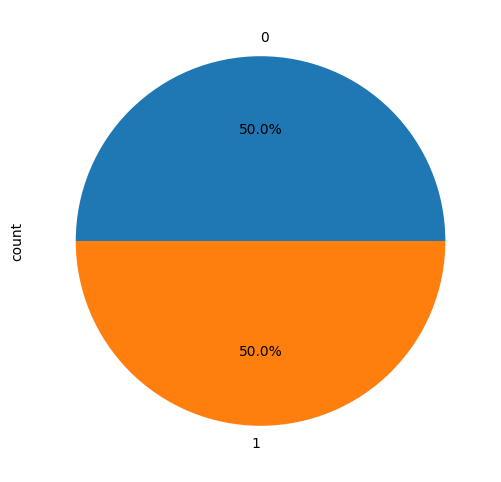

In [18]:
# check distribution of fake vs real reviews
print(df['Real=1/Fake=0'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6)))
# pprint(df['positive=1/negative=0'].value_counts())

## Univariate Analysis

### Distribution of review length (NWO, NST)

Fake reviews may have shorter or longer than normal lengths.


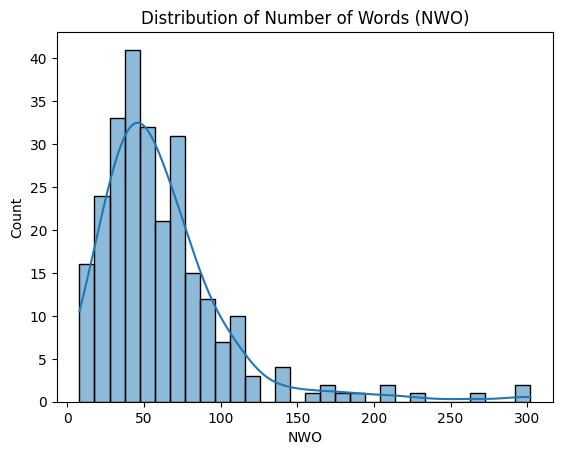

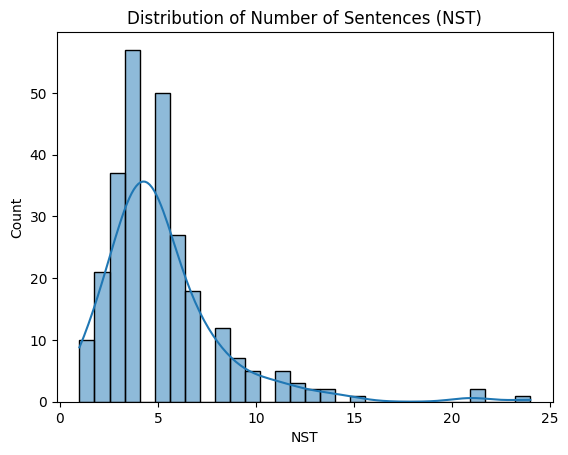

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['NWO'], bins=30, kde=True)
plt.title("Distribution of Number of Words (NWO)")
plt.show()

sns.histplot(df['NST'], bins=30, kde=True)
plt.title("Distribution of Number of Sentences (NST)")
plt.show()

### Word-level complexity (AWL, CDV)

Fake reviews may have simpler language (lower AWL/CDV).

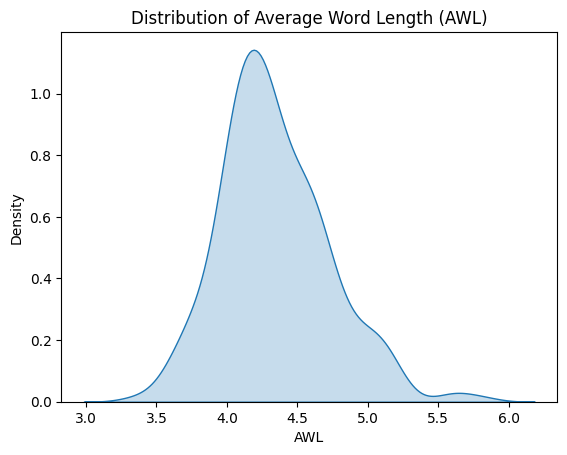

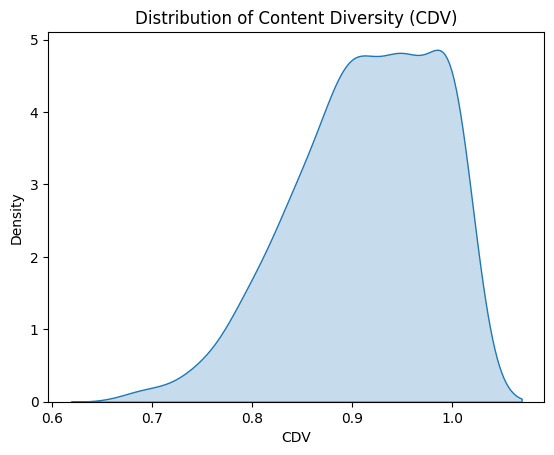

In [20]:
sns.kdeplot(df['AWL'], fill=True)
plt.title("Distribution of Average Word Length (AWL)")
plt.show()

sns.kdeplot(df['CDV'], fill=True)
plt.title("Distribution of Content Diversity (CDV)")
plt.show()


### Typo patterns (NTP, TPR)

Generally fake reviews contain more typos, however, here we observe that real reviews contain more typos suggesting fake review may be bot generated.

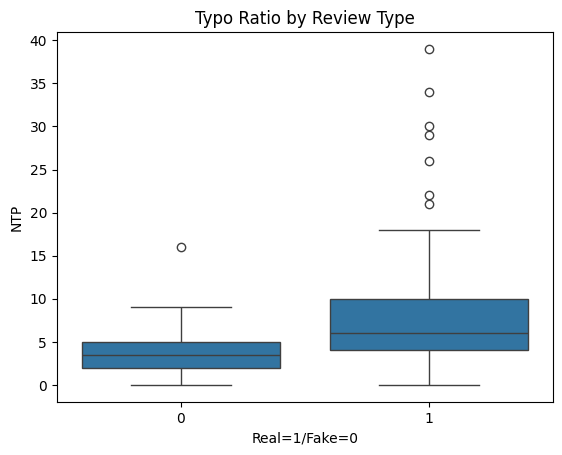

In [21]:
sns.boxplot(x='Real=1/Fake=0', y='NTP', data=df)
plt.title("Typo Ratio by Review Type")
plt.show()

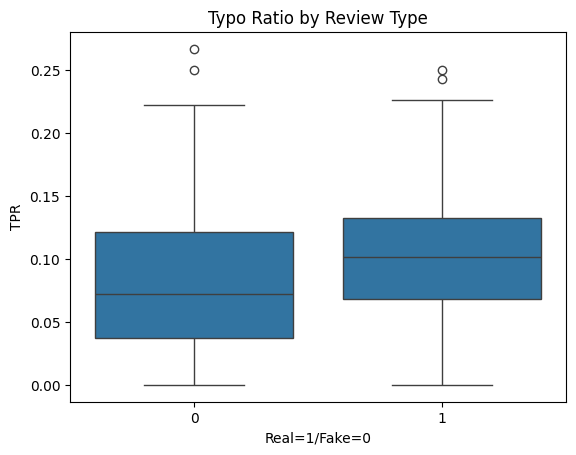

In [22]:
sns.boxplot(x='Real=1/Fake=0', y='TPR', data=df)
plt.title("Typo Ratio by Review Type")
plt.show()

### Passive Voice vs. Fake Reviews

Fake reviews might use less passive voice to advertise blatantly.

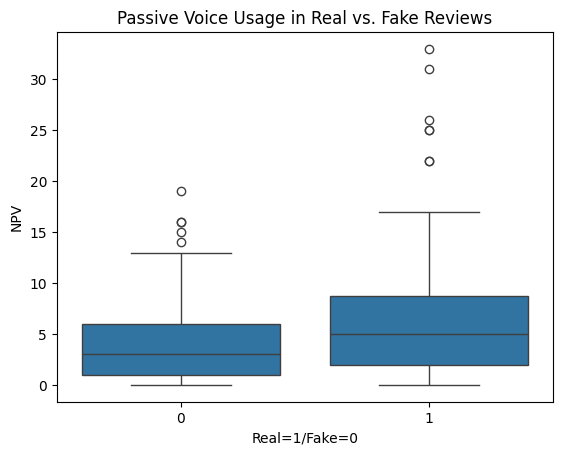

In [23]:
sns.boxplot(x='Real=1/Fake=0', y='NPV', data=df)
plt.title("Passive Voice Usage in Real vs. Fake Reviews")
plt.show()

## Bivariate Analysis

Compare feature distributions for Fake vs. Real reviews

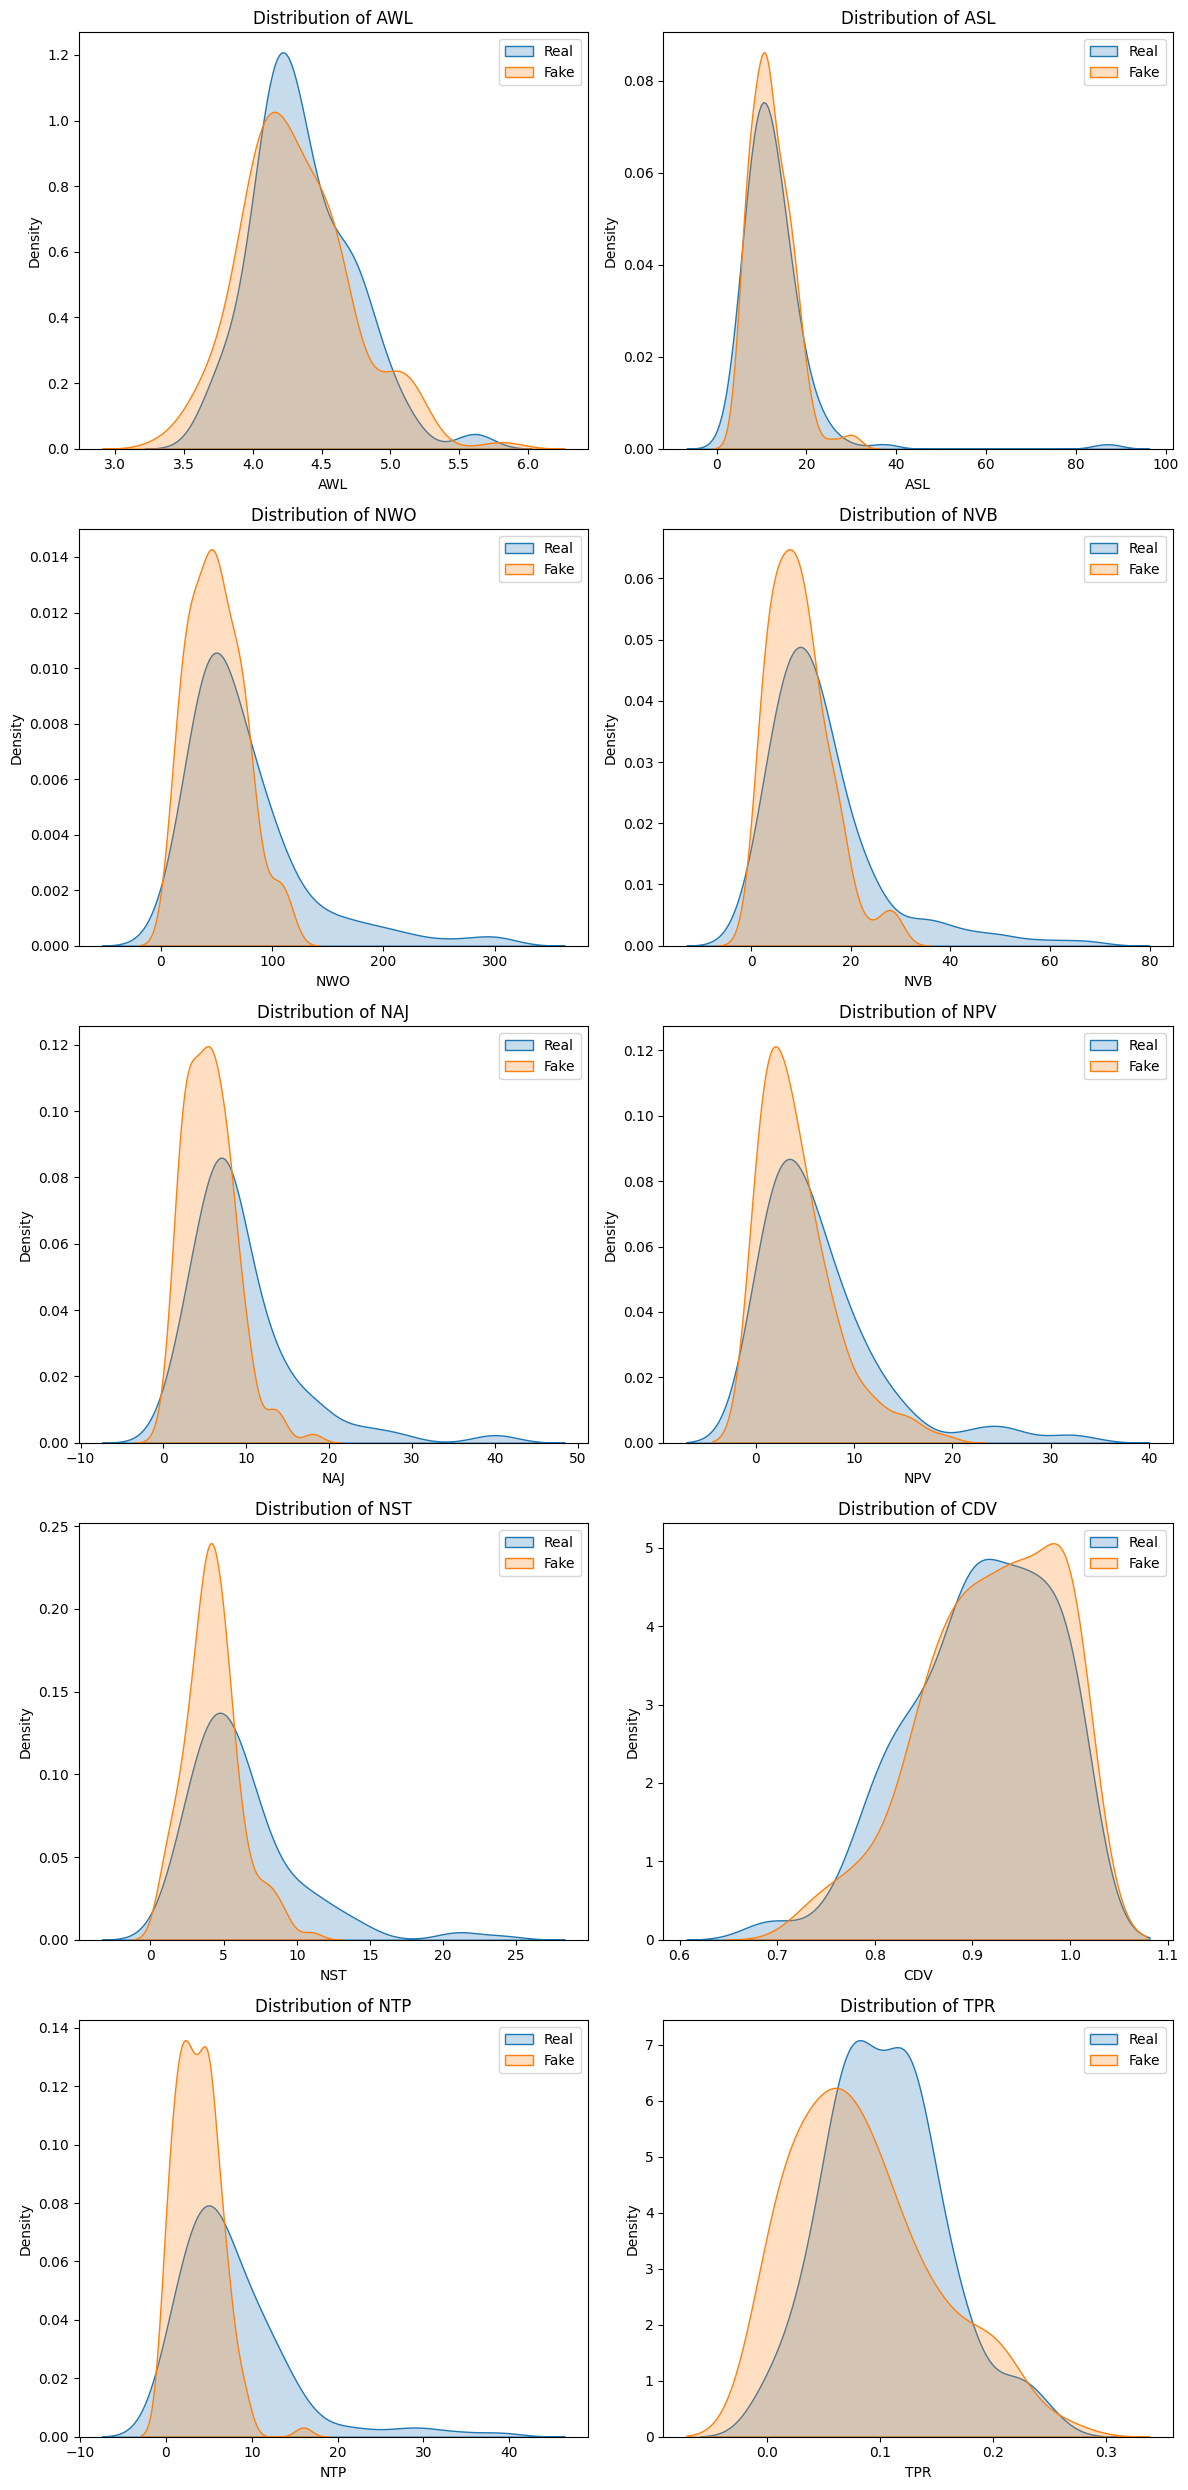

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of columns and rows for the grid
n_cols = 2
n_rows = (len(features) + 1) // n_cols  # Calculate number of rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flatten axes array to easily iterate over them

for idx, feature in enumerate(features):
    ax = axes[idx]  # Get the corresponding axis for each feature
    sns.kdeplot(df[df['Real=1/Fake=0'] == 1][feature], label="Real", fill=True, ax=ax)
    sns.kdeplot(df[df['Real=1/Fake=0'] == 0][feature], label="Fake", fill=True, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.legend()

# Hide any unused axes
for idx in range(len(features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Correlation Heatmap

To identify correlation between features

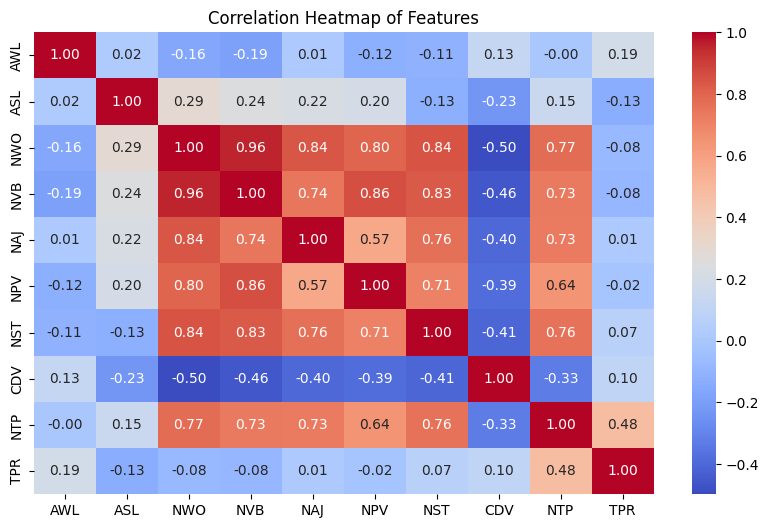

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Review', 'Real=1/Fake=0']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Word Cloud for Real vs Fake Reviews

Fake reviews may have more exaggerated words

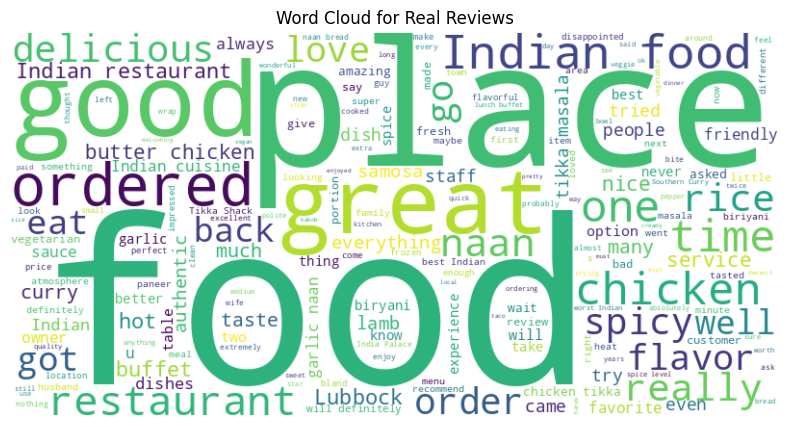

In [26]:
from wordcloud import WordCloud

real_reviews = " ".join(df[df['Real=1/Fake=0'] == 1]['Review'])

wordcloud_real = WordCloud(width=800, background_color='white', height=400).generate(real_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Real Reviews")
plt.show()

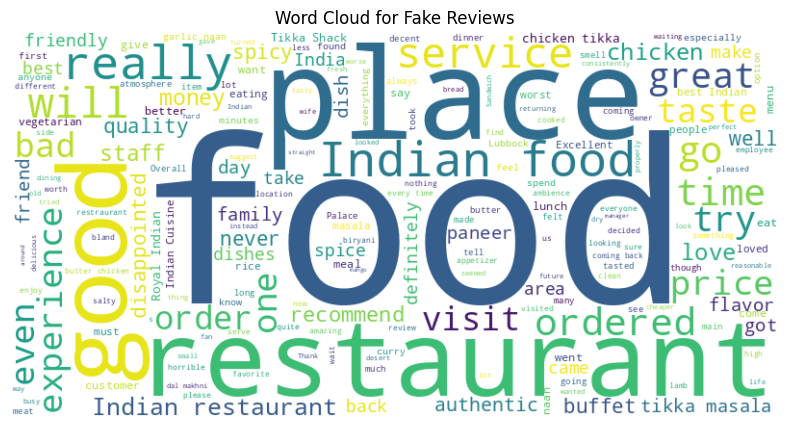

In [27]:
fake_reviews = " ".join(df[df['Real=1/Fake=0'] == 0]['Review'])
wordcloud_fake = WordCloud(width=800, background_color='white', height=400).generate(fake_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Fake Reviews")
plt.show()

### Most Frequent Words in Fake vs. Real Reviews

Fake reviews may have generic or repeated words.

In [28]:
# Define the stopwords
stopwords_set = set(stopwords.words('english'))

# Split the reviews into words
real_words = " ".join(df[df['Real=1/Fake=0'] == 1]['Review']).split()
fake_words = " ".join(df[df['Real=1/Fake=0'] == 0]['Review']).split()

# Remove stopwords from the lists of words
real_words_filtered = [word for word in real_words if word.lower() not in stopwords_set]
fake_words_filtered = [word for word in fake_words if word.lower() not in stopwords_set]

# Count the most common words
real_word_counts = Counter(real_words_filtered).most_common(20)
fake_word_counts = Counter(fake_words_filtered).most_common(20)

# Print the most common words
print("Most common words in Real reviews:", real_word_counts)
print("Most common words in Fake reviews:", fake_word_counts)

Most common words in Real reviews: [('food', 103), ('Indian', 96), ('good', 41), ('place', 41), ('chicken', 39), ('like', 38), ('ordered', 33), ('one', 29), ('restaurant', 29), ('also', 27), ('really', 26), ('naan', 26), ('food.', 24), ('rice', 23), ('time', 23), ('got', 23), ('garlic', 23), ('great', 22), ('butter', 21), ('get', 21)]
Most common words in Fake reviews: [('food', 105), ('Indian', 72), ('place', 50), ('restaurant', 41), ('like', 37), ('really', 35), ('would', 33), ('good', 28), ('food.', 23), ('service', 22), ('go', 21), ('place.', 21), ('also', 20), ('time', 20), ('chicken', 19), ('even', 18), ('try', 17), ('ordered', 17), ('visit', 16), ('ever', 16)]


# Model Training and Evaluation

In [29]:
def print_dataset_sizes(X_train, X_val, X_test, y_train, y_val, y_test):
    """Prints dataset sizes for Train, Validation, and Test sets."""
    print("\nDataset Sizes:")
    print(f" - X Train:   {X_train.shape}")
    print(f" - X Val:     {X_val.shape}")
    print(f" - X Test:    {X_test.shape}")

    print("\nLabel Sizes:")
    print(f" - y Train:   {y_train.shape}")
    print(f" - y Val:     {y_val.shape}")
    print(f" - y Test:    {y_test.shape}")

## Split and shuffle data

In [30]:
feature_columns = ['AWL', 'ASL', 'NWO', 'NVB', 'NAJ', 'NPV', 'NST', 'CDV', 'NTP', 'TPR']
X = df[feature_columns]
y = df['Real=1/Fake=0']

# Stratified split to maintain equal fake/real review distribution (60% Train, 20% Val, 20% Test)
# First split: 60% train, 40% temp (will split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=SEED,
    shuffle=True
)

# Second split: 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=SEED,
    shuffle=True
)

# Print dataset sizes
print_dataset_sizes(X_train, X_val, X_test, y_train, y_val, y_test)


Dataset Sizes:
 - X Train:   (156, 10)
 - X Val:     (52, 10)
 - X Test:    (52, 10)

Label Sizes:
 - y Train:   (156,)
 - y Val:     (52,)
 - y Test:    (52,)


## Feature Selection

In [31]:
# RandomForest for feature selection with RFECV
rf = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector = RFECV(estimator=rf, step=1, cv=5, scoring='f1')

# Fit RFECV to find the best features
feature_selector.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=42), scoring='f1')

In [32]:
# Get feature rankings
feature_ranks = sorted(zip(feature_columns, feature_selector.ranking_), key=lambda x: x[1])

# Print feature rankings
print("\nFeature Ranking (Lower is Better):")
for rank, (feature, score) in enumerate(feature_ranks, 1):
    print(f"{rank}. {feature} - Rank {score}")

# get selected features
selected_features = [feature_columns[i] for i in range(len(feature_columns)) if feature_selector.support_[i]]

print("\nBest Number of Features:", feature_selector.n_features_)
print("Selected Features:", selected_features)


Feature Ranking (Lower is Better):
1. AWL - Rank 1
2. ASL - Rank 1
3. NWO - Rank 1
4. NAJ - Rank 1
5. NTP - Rank 1
6. TPR - Rank 1
7. NVB - Rank 2
8. CDV - Rank 3
9. NST - Rank 4
10. NPV - Rank 5

Best Number of Features: 6
Selected Features: ['AWL', 'ASL', 'NWO', 'NAJ', 'NTP', 'TPR']


In [33]:
# Transform datasets using only selected features
X_train_selected = feature_selector.transform(X_train)
X_val_selected = feature_selector.transform(X_val)
X_test_selected = feature_selector.transform(X_test)

# Print dataset sizes
print_dataset_sizes(X_train_selected, X_val_selected, X_test_selected, y_train, y_val, y_test)


Dataset Sizes:
 - X Train:   (156, 6)
 - X Val:     (52, 6)
 - X Test:    (52, 6)

Label Sizes:
 - y Train:   (156,)
 - y Val:     (52,)
 - y Test:    (52,)


## Model Training

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
import pandas as pd

# Define 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Concatenate Training and Validation sets for Hyperparameter Tuning
X_train_combined = np.vstack((X_train_selected, X_val_selected))
y_train_combined = np.hstack((y_train, y_val))

# Define hyperparameter grids
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2']
}

# Random Forest Hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', 0.33],
    'min_samples_leaf': [2, 4, 8],
    'min_samples_split': [5, 10, 15],
    'max_samples': [0.7, 0.8, 0.9],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

# Extreme Gradient Boosting Hyperparameters
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# SVM Hyperparameters
param_grid_svm = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': uniform(0.1, 100),
    'degree': randint(3, 10),
    'gamma': ['scale', 'auto'],
}

# Train models
models = {
    "Logistic Regression": (LogisticRegression(), param_grid_lr),
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb),
    "SVM": (SVC(), param_grid_svm)
}


best_models = {}
all_results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")

    # Perform RandomizedSearchCV for each model
    random_search = RandomizedSearchCV(
        model,
        param_grid,
        n_iter=10,  # Number of iterations for random search
        cv=cv,
        scoring='f1',
        n_jobs=-1,   # Use all CPU cores
        verbose=1,   # Print progress during search
        random_state=42
    )
    random_search.fit(X_train_combined, y_train_combined)

    # Store the best model for later use
    best_models[model_name] = random_search.best_estimator_

    # Store the results for each model
    all_results[model_name] = random_search.cv_results_

    # Print the best hyperparameters for the current model
    print(f"Best {model_name} Model: {random_search.best_params_}")

    val_score = random_search.score(X_val_selected, y_val)
    print(f"Validation Score: {val_score:.4f}")

Running RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Model: {'solver': 'saga', 'penalty': 'l2', 'class_weight': None, 'C': 1}
Validation Score: 0.7407
Running RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueError:

Best Random Forest Model: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_samples': 0.9, 'max_features': 0.33, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Validation Score: 0.8750
Running RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:28:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Model: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Validation Score: 1.0000
Running RandomizedSearchCV for SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SVM Model: {'C': 78.06910002727692, 'degree': 7, 'gamma': 'scale', 'kernel': 'linear'}
Validation Score: 0.6809


In [35]:
# Convert all results to DataFrames and save to CSV files
for model_name, results in all_results.items():
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'{model_name}_cv_results.csv', index=False)  # Save each model's results

    print(f"\nTop Results for {model_name}:")
    pprint(results_df)


Top Results for Logistic Regression:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010960,0.001573,0.004491,0.000441,saga,l2,None,1.000,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.700000,0.711111,0.739130,0.666667,0.590909,0.681563,0.050926,1
1,0.006486,0.001869,0.003876,0.000110,liblinear,l1,None,100.000,"{'solver': 'liblinear', 'penalty': 'l1', 'clas...",0.702703,0.529412,0.727273,0.650000,0.604651,0.642808,0.070835,7
2,0.002183,0.000338,0.004389,0.001128,liblinear,l2,None,1.000,"{'solver': 'liblinear', 'penalty': 'l2', 'clas...",0.578947,0.611111,0.714286,0.682927,0.619048,0.641264,0.049707,8
3,0.008362,0.001405,0.005638,0.002241,saga,l2,None,100.000,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.700000,0.711111,0.739130,0.666667,0.590909,0.681563,0.050926,1
4,0.002940,0.000443,0.004359,0.000972,liblinear,l1,None,1.000,"{'solver': 'liblinear', 'penalty': 'l1', 'clas...",0.578947,0.611111,0.697674,0.682927,0.604651,0.635062,0.046602,9
5,0.010562,0.000584,0.005048,0.001244,saga,l1,balanced,10.000,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.700000,0.711111,0.739130,0.652174,0.558140,0.672111,0.063525,5
6,0.002474,0.000485,0.003667,0.000195,liblinear,l1,balanced,0.010,"{'solver': 'liblinear', 'penalty': 'l1', 'clas...",0.666667,0.666667,0.666667,0.688525,0.530612,0.643827,0.057237,6
7,0.008175,0.001101,0.005976,0.002175,saga,l2,None,0.100,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.700000,0.711111,0.739130,0.652174,0.590909,0.678665,0.052090,3
8,0.002411,0.000501,0.004057,0.000731,liblinear,l1,balanced,0.001,"{'solver': 'liblinear', 'penalty': 'l1', 'clas...",0.000000,0.000000,0.000000,0.677419,0.655738,0.266631,0.326627,10
9,0.008784,0.001638,0.004487,0.000690,saga,l1,None,1.000,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.700000,0.711111,0.739130,0.652174,0.590909,0.678665,0.052090,3



Top Results for Random Forest:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002883,0.000710,0.000000,0.000000,200,15,2,0.9,0.33,10,...,False,"{'n_estimators': 200, 'min_samples_split': 15,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.866314,0.157036,0.053558,0.013408,300,10,8,0.8,log2,20,...,True,"{'n_estimators': 300, 'min_samples_split': 10,...",0.571429,0.545455,0.727273,0.604651,0.619048,0.613571,0.062375,5
2,1.402302,0.021382,0.045453,0.009422,300,15,4,0.8,sqrt,15,...,True,"{'n_estimators': 300, 'min_samples_split': 15,...",0.571429,0.588235,0.711111,0.636364,0.604651,0.622358,0.049285,4
3,0.650711,0.155019,0.033369,0.007953,200,15,2,0.7,log2,10,...,True,"{'n_estimators': 200, 'min_samples_split': 15,...",0.540541,0.545455,0.695652,0.604651,0.590909,0.595442,0.055965,7
4,0.001368,0.000037,0.000000,0.000000,200,15,8,0.7,log2,15,...,False,"{'n_estimators': 200, 'min_samples_split': 15,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.532701,0.011542,0.027844,0.000304,200,5,4,0.9,log2,20,...,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.540541,0.588235,0.739130,0.651163,0.604651,0.624744,0.067244,2
6,0.002272,0.000094,0.000000,0.000000,200,5,2,0.8,0.33,10,...,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
7,0.498702,0.004205,0.029209,0.002215,200,15,2,0.9,0.33,10,...,True,"{'n_estimators': 200, 'min_samples_split': 15,...",0.571429,0.631579,0.727273,0.619048,0.604651,0.630796,0.052258,1
8,0.505642,0.011141,0.028065,0.000395,200,15,8,0.8,sqrt,15,...,True,"{'n_estimators': 200, 'min_samples_split': 15,...",0.571429,0.529412,0.711111,0.619048,0.604651,0.607130,0.060457,6
9,0.477928,0.065747,0.025260,0.004732,200,15,4,0.9,0.33,15,...,True,"{'n_estimators': 200, 'min_samples_split': 15,...",0.571429,0.611111,0.711111,0.619048,0.604651,0.623470,0.046724,3



Top Results for XGBoost:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_lambda,param_reg_alpha,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057662,0.002561,0.008081,0.001518,1.0,0.1,1.0,5,0.05,0.0,0.8,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.578947,0.648649,0.727273,0.595745,0.585366,0.627196,0.055754,2
1,0.062496,0.005406,0.007711,0.001437,0.8,1.0,1.0,7,0.01,0.2,0.8,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.540541,0.500000,0.711111,0.604651,0.604651,0.592191,0.071581,10
2,0.068086,0.018236,0.007967,0.002098,1.0,0.1,1.0,7,0.05,0.1,0.8,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.555556,0.628571,0.711111,0.595745,0.600000,0.618197,0.051961,3
3,0.055927,0.007012,0.008475,0.002973,0.6,1.0,0.1,5,0.05,0.1,0.8,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.540541,0.611111,0.711111,0.604651,0.571429,0.607768,0.057517,7
4,0.042117,0.002620,0.006721,0.000387,0.6,0.0,1.0,3,0.10,0.0,1.0,"{'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha...",0.540541,0.594595,0.727273,0.608696,0.585366,0.611294,0.062314,6
5,0.057181,0.005346,0.006933,0.000425,0.6,0.0,0.1,7,0.10,0.2,1.0,"{'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha...",0.578947,0.564103,0.711111,0.553191,0.571429,0.595756,0.058301,9
6,0.054452,0.003009,0.007135,0.000544,0.8,1.0,0.0,7,0.10,0.1,0.6,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.594595,0.648649,0.744186,0.625000,0.571429,0.636772,0.059776,1
7,0.040378,0.002363,0.006036,0.000084,1.0,0.1,1.0,3,0.01,0.2,0.8,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.571429,0.529412,0.727273,0.636364,0.604651,0.613826,0.066911,4
8,0.037307,0.001584,0.006743,0.000659,0.6,1.0,0.0,3,0.05,0.1,0.6,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.571429,0.529412,0.711111,0.636364,0.619048,0.613473,0.061518,5
9,0.053401,0.013700,0.009012,0.002145,0.6,1.0,1.0,3,0.01,0.0,1.0,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.540541,0.500000,0.711111,0.651163,0.604651,0.601493,0.075511,8



Top Results for SVM:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089530,0.035500,0.005565,0.002456,37.554012,7,scale,poly,"{'C': 37.55401188473625, 'degree': 7, 'gamma':...",0.551724,0.307692,0.413793,0.516129,0.400000,0.437868,0.087232,8
1,9.434316,3.796680,0.004307,0.000234,78.069100,7,scale,linear,"{'C': 78.06910002727692, 'degree': 7, 'gamma':...",0.647059,0.611111,0.744186,0.650000,0.636364,0.657744,0.045339,1
2,0.003642,0.000779,0.004104,0.000243,15.699452,5,scale,sigmoid,"{'C': 15.699452033620265, 'degree': 5, 'gamma'...",0.390244,0.521739,0.421053,0.558140,0.461538,0.470543,0.062085,6
3,0.004330,0.000075,0.005067,0.000120,33.470861,5,auto,rbf,"{'C': 33.47086111390219, 'degree': 5, 'gamma':...",0.638298,0.454545,0.640000,0.512821,0.608696,0.570872,0.074374,4
4,15.761342,7.338962,0.003894,0.000490,97.090985,6,auto,linear,"{'C': 97.09098521619943, 'degree': 6, 'gamma':...",0.647059,0.611111,0.744186,0.650000,0.604651,0.651401,0.049877,2
5,0.003483,0.000054,0.004727,0.000359,0.177877,6,scale,rbf,"{'C': 0.17787658410143284, 'degree': 6, 'gamma...",0.090909,0.230769,0.484848,0.387097,0.388889,0.316502,0.139145,10
6,0.003201,0.000018,0.004044,0.000030,30.524224,8,scale,sigmoid,"{'C': 30.524224295953772, 'degree': 8, 'gamma'...",0.390244,0.521739,0.421053,0.558140,0.461538,0.470543,0.062085,6
7,0.005709,0.000502,0.004086,0.000076,2.406243,5,scale,poly,"{'C': 2.406242504141576, 'degree': 5, 'gamma':...",0.444444,0.166667,0.451613,0.516129,0.357143,0.387199,0.121315,9
8,0.003058,0.000181,0.004264,0.000276,14.049386,6,auto,sigmoid,"{'C': 14.049386065204184, 'degree': 6, 'gamma'...",0.666667,0.666667,0.666667,0.000000,0.655738,0.531148,0.265607,5
9,3.542631,2.986190,0.004194,0.000069,23.377134,8,scale,linear,"{'C': 23.377134043030424, 'degree': 8, 'gamma'...",0.702703,0.571429,0.714286,0.650000,0.604651,0.648614,0.055010,3


In [36]:
import pandas as pd

# Define the list of models whose results were saved as CSVs
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']

# Iterate over each model and load its results
for model_name in model_names:
    # Load the CSV file containing the results for the model
    results_df = pd.read_csv(f'{model_name}_cv_results.csv')

    # Print general info about the model's results
    print(f"\nResults for {model_name}:")
    print(f"Total number of hyperparameter combinations tested: {len(results_df)}")

    # Show the top 5 results sorted by the mean_test_score (performance metric)
    print("\nTop 5 hyperparameter combinations (sorted by mean test score):")
    top_results = results_df[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head()
    pprint(top_results)

    # You can also print the best hyperparameters for the model
    best_result = results_df.loc[results_df['mean_test_score'].idxmax()]
    print(f"\nBest hyperparameters for {model_name}:")
    pprint(best_result[['params', 'mean_test_score']])

    # Optionally, if you want to explore other metrics (like the best validation score, etc.)
    # You can extract other performance metrics and print them.
    print(f"\nDetailed Report for {model_name}:")
    detailed_report = results_df[['params', 'mean_test_score', 'std_test_score']]
    pprint(detailed_report.sort_values(by='mean_test_score', ascending=False).head())



Results for Logistic Regression:
Total number of hyperparameter combinations tested: 10

Top 5 hyperparameter combinations (sorted by mean test score):


,params,mean_test_score,std_test_score
0,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.681563,0.050926
3,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.681563,0.050926
7,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.678665,0.052090
9,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.678665,0.052090
5,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.672111,0.063525



Best hyperparameters for Logistic Regression:


,0
params,"{'solver': 'saga', 'penalty': 'l2', 'class_wei..."
mean_test_score,0.681563



Detailed Report for Logistic Regression:


,params,mean_test_score,std_test_score
0,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.681563,0.050926
3,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.681563,0.050926
7,"{'solver': 'saga', 'penalty': 'l2', 'class_wei...",0.678665,0.052090
9,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.678665,0.052090
5,"{'solver': 'saga', 'penalty': 'l1', 'class_wei...",0.672111,0.063525



Results for Random Forest:
Total number of hyperparameter combinations tested: 10

Top 5 hyperparameter combinations (sorted by mean test score):


,params,mean_test_score,std_test_score
7,"{'n_estimators': 200, 'min_samples_split': 15,...",0.630796,0.052258
5,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.624744,0.067244
9,"{'n_estimators': 200, 'min_samples_split': 15,...",0.623470,0.046724
2,"{'n_estimators': 300, 'min_samples_split': 15,...",0.622358,0.049285
1,"{'n_estimators': 300, 'min_samples_split': 10,...",0.613571,0.062375



Best hyperparameters for Random Forest:


,7
params,"{'n_estimators': 200, 'min_samples_split': 15,..."
mean_test_score,0.630796



Detailed Report for Random Forest:


,params,mean_test_score,std_test_score
7,"{'n_estimators': 200, 'min_samples_split': 15,...",0.630796,0.052258
5,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.624744,0.067244
9,"{'n_estimators': 200, 'min_samples_split': 15,...",0.623470,0.046724
2,"{'n_estimators': 300, 'min_samples_split': 15,...",0.622358,0.049285
1,"{'n_estimators': 300, 'min_samples_split': 10,...",0.613571,0.062375



Results for XGBoost:
Total number of hyperparameter combinations tested: 10

Top 5 hyperparameter combinations (sorted by mean test score):


,params,mean_test_score,std_test_score
6,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.636772,0.059776
0,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.627196,0.055754
2,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.618197,0.051961
7,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.613826,0.066911
8,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.613473,0.061518



Best hyperparameters for XGBoost:


,6
params,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha..."
mean_test_score,0.636772



Detailed Report for XGBoost:


,params,mean_test_score,std_test_score
6,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",0.636772,0.059776
0,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.627196,0.055754
2,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.618197,0.051961
7,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.613826,0.066911
8,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.613473,0.061518



Results for SVM:
Total number of hyperparameter combinations tested: 10

Top 5 hyperparameter combinations (sorted by mean test score):


,params,mean_test_score,std_test_score
1,"{'C': 78.06910002727692, 'degree': 7, 'gamma':...",0.657744,0.045339
4,"{'C': 97.09098521619943, 'degree': 6, 'gamma':...",0.651401,0.049877
9,"{'C': 23.377134043030424, 'degree': 8, 'gamma'...",0.648614,0.055010
3,"{'C': 33.47086111390219, 'degree': 5, 'gamma':...",0.570872,0.074374
8,"{'C': 14.049386065204184, 'degree': 6, 'gamma'...",0.531148,0.265607



Best hyperparameters for SVM:


,1
params,"{'C': 78.06910002727692, 'degree': 7, 'gamma':..."
mean_test_score,0.657744



Detailed Report for SVM:


,params,mean_test_score,std_test_score
1,"{'C': 78.06910002727692, 'degree': 7, 'gamma':...",0.657744,0.045339
4,"{'C': 97.09098521619943, 'degree': 6, 'gamma':...",0.651401,0.049877
9,"{'C': 23.377134043030424, 'degree': 8, 'gamma'...",0.648614,0.055010
3,"{'C': 33.47086111390219, 'degree': 5, 'gamma':...",0.570872,0.074374
8,"{'C': 14.049386065204184, 'degree': 6, 'gamma'...",0.531148,0.265607


## Save best models

In [37]:
import joblib

# Save models
for model_name, model in best_models.items():
    joblib.dump(model, f"{model_name.replace(' ', '_')}_best_model.pkl")

## Model Evaluation


Retraining Logistic Regression with best hyperparameters on full training+validation set...

Retraining Random Forest with best hyperparameters on full training+validation set...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Retraining XGBoost with best hyperparameters on full training+validation set...

Retraining SVM with best hyperparameters on full training+validation set...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating Logistic Regression on Train and Test Sets...

Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        26
           1       0.63      0.65      0.64        26

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.63      0.63      0.63        52



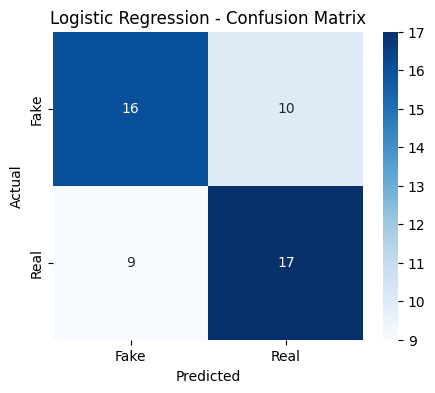


Evaluating Random Forest on Train and Test Sets...

Random Forest Performance on Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.71      0.58      0.64        26

    accuracy                           0.67        52
   macro avg       0.68      0.67      0.67        52
weighted avg       0.68      0.67      0.67        52



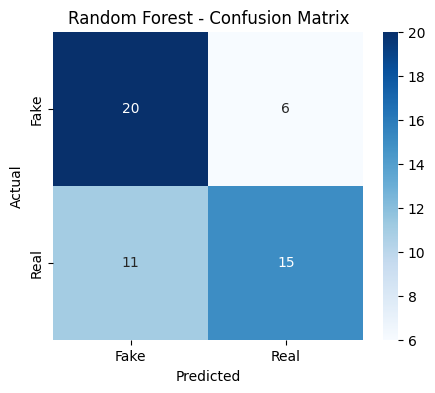


Random Forest Feature Importance Ranking:
1. NTP: 0.2239
2. NAJ: 0.1821
3. TPR: 0.1657
4. NWO: 0.1554
5. AWL: 0.1390
6. ASL: 0.1339

Evaluating XGBoost on Train and Test Sets...

XGBoost Performance on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65        26
           1       0.65      0.58      0.61        26

    accuracy                           0.63        52
   macro avg       0.64      0.63      0.63        52
weighted avg       0.64      0.63      0.63        52



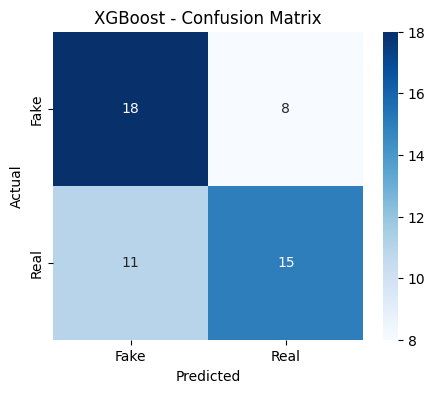


XGBoost Feature Importance Ranking:
1. NTP: 0.2685
2. NAJ: 0.1527
3. TPR: 0.1509
4. ASL: 0.1483
5. AWL: 0.1414
6. NWO: 0.1381

Evaluating SVM on Train and Test Sets...

SVM Performance on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70        26
           1       0.72      0.50      0.59        26

    accuracy                           0.65        52
   macro avg       0.67      0.65      0.65        52
weighted avg       0.67      0.65      0.65        52



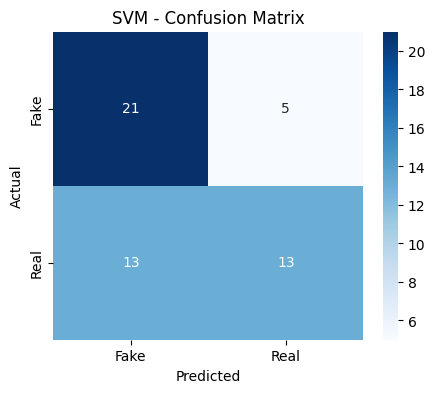

In [38]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Retrain the best models using the combined training + validation set
retrained_models = {}

for model_name, model in best_models.items():
    print(f"\nRetraining {model_name} with best hyperparameters on full training+validation set...")

    # Retrain the model on the full train + validation dataset
    retrained_model = model.set_params(**model.get_params())  # Ensure the best params are set
    retrained_model.fit(X_train_combined, y_train_combined)  # Train on combined dataset

    # Store the retrained model
    retrained_models[model_name] = retrained_model

# Initialize list to store results
results = []

# Evaluate each model
for model_name, model in retrained_models.items():
    print(f"\nEvaluating {model_name} on Train and Test Sets...")

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_combined)
    y_test_pred = model.predict(X_test_selected)

    # Train metrics
    train_acc = accuracy_score(y_train_combined, y_train_pred)
    train_f1 = f1_score(y_train_combined, y_train_pred)

    # Test metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print classification report for test set
    print(f"\n{model_name} Performance on Test Set:")
    print(classification_report(y_test, y_test_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Feature Importance (for tree-based models)
    most_important_feature = None
    if hasattr(model, "feature_importances_"):  # Only tree-based models have this attribute
        importance = model.feature_importances_
        feature_importance = sorted(zip(selected_features, importance), key=lambda x: x[1], reverse=True)

        print(f"\n{model_name} Feature Importance Ranking:")
        for rank, (feature, score) in enumerate(feature_importance, 1):
            print(f"{rank}. {feature}: {score:.4f}")

        most_important_feature = feature_importance[0][0]  # The most important feature

    # Append the results for both train and test performance and feature analysis
    num_selected_features = len(selected_features)
    results.append([model_name, train_acc, train_f1, test_acc, test_f1, num_selected_features, most_important_feature])

# Convert results into DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Train F1-score', 'Test Accuracy', 'Test F1-score', 'Num Features', 'Most Important Feature'])

In [39]:
# Print the summary table
print("\nModel Performance and Feature Importance Summary:")
pprint(results_df)


Model Performance and Feature Importance Summary:


,Model,Train Accuracy,Train F1-score,Test Accuracy,Test F1-score,Num Features,Most Important Feature
0,Logistic Regression,0.673077,0.688073,0.634615,0.641509,6,None
1,Random Forest,0.850962,0.841026,0.673077,0.638298,6,NTP
2,XGBoost,0.990385,0.990385,0.634615,0.612245,6,NTP
3,SVM,0.692308,0.676768,0.653846,0.590909,6,None


In [40]:
# save the results to a CSV file
results_df.to_csv('model_performance_results.csv', index=False)